In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR, SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
df = pd.read_csv(r'Datasets/movie_classification.csv')

In [3]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400,1


In [4]:
print('rows:', df.shape[0], '| columns:', df.shape[1])

rows: 506 | columns: 19


In [5]:
# missing values in Time_taken
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

In [6]:
# missing value imputation with mean
df['Time_taken'].fillna(df['Time_taken'].mean(), inplace=True)

In [7]:
# one-hot encoding for categorical data
df = pd.get_dummies(data=df, drop_first=True)

In [8]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,...,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,...,109.60,223.840,23,494,48000,1,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,...,146.64,243.456,42,462,43200,0,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,...,147.88,2022.400,38,458,69400,1,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,...,185.36,225.344,45,472,66800,1,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,...,176.48,225.792,55,395,72400,1,0,0,1,0


In [9]:
X = df.drop(columns=['Collection'])
y = df['Collection']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [11]:
print(X_train.shape, X_test.shape, sep='\n')

(404, 20)
(102, 20)


In [12]:
scaler = StandardScaler().fit(X_train)
Xs_train = scaler.transform(X_train)
Xs_test = scaler.transform(X_test)

In [13]:
Xs_train[0]

array([-0.37257438, -0.70492455,  0.42487874,  0.93567804,  0.69366877,
        0.44260898,  0.4259219 ,  0.43335791,  0.44757662,  1.07963602,
        0.44638354,  0.56941731, -0.33434417, -1.31368908, -0.0867923 ,
        0.92369422, -1.10997486, -0.66547513, -0.48525664,  1.3293319 ])

### Support Vector Regressor

In [14]:
# negative R2 score implies that the model has performed worse than simply predicting mean
svr = SVR().fit(Xs_train, y_train)
print('train R2 score:', round(svr.score(Xs_train, y_train), 3))
print('test R2 score:', round(svr.score(Xs_test, y_test), 3))

train R2 score: -0.015
test R2 score: -0.009


In [15]:
estimator = SVR()
params = {'kernel':['linear', 'poly', 'rbf'], 
          'C':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 100, 500]}
gridsearch = GridSearchCV(estimator=estimator, 
                          param_grid=params, 
                          cv=5, 
                          scoring='r2', 
                          n_jobs=-1).fit(Xs_train, y_train)

In [16]:
gridsearch.best_params_

{'C': 500, 'kernel': 'linear'}

In [17]:
print('grid search best score', round(gridsearch.best_score_, 3))

grid search best score 0.713


In [18]:
svr = gridsearch.best_estimator_

In [19]:
print('train R2 score:', round(svr.score(Xs_train, y_train), 3))
print('test R2 score:', round(svr.score(Xs_test, y_test), 3))

train R2 score: 0.746
test R2 score: 0.546


### Support Vector Classifier

In [20]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,...,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,...,109.60,223.840,23,494,48000,1,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,...,146.64,243.456,42,462,43200,0,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,...,147.88,2022.400,38,458,69400,1,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,...,185.36,225.344,45,472,66800,1,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,...,176.48,225.792,55,395,72400,1,0,0,1,0


In [21]:
X = df.drop(columns=['Start_Tech_Oscar'])
y = df['Start_Tech_Oscar']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [23]:
print(X_train.shape, X_test.shape, sep='\n')

(404, 20)
(102, 20)


In [24]:
scaler = StandardScaler().fit(X_train)
Xs_train = scaler.transform(X_train)
Xs_test = scaler.transform(X_test)

In [25]:
Xs_train[0]

array([-0.37257438, -0.70492455,  0.42487874,  0.93567804,  0.69366877,
        0.44260898,  0.4259219 ,  0.43335791,  0.44757662,  1.07963602,
        0.44638354,  0.56941731, -0.33434417, -1.31368908, -0.0867923 ,
        0.44572353, -1.10997486, -0.66547513, -0.48525664,  1.3293319 ])

In [26]:
svc = SVC().fit(Xs_train, y_train)
print('accuracy train:', round(svc.score(Xs_train, y_train)*100, 2))
print('accuracy test:', round(svc.score(Xs_test, y_test)*100, 2))

accuracy train: 76.24
accuracy test: 60.78


In [27]:
estimator = SVC()
params = {'kernel':['linear', 'poly', 'rbf'], 
          'C':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 100, 500]}
gridsearch = GridSearchCV(estimator=estimator, 
                          param_grid=params, 
                          cv=5, 
                          scoring='accuracy', 
                          n_jobs=-1).fit(Xs_train, y_train)

In [28]:
gridsearch.best_params_

{'C': 0.05, 'kernel': 'linear'}

In [29]:
svc = gridsearch.best_estimator_
print('accuracy train:', round(svc.score(Xs_train, y_train)*100, 2))
print('accuracy test:', round(svc.score(Xs_test, y_test)*100, 2))

accuracy train: 65.84
accuracy test: 59.8


In [30]:
test_matrix = confusion_matrix(y_test, svc.predict(Xs_test))
train_matrix = confusion_matrix(y_train, svc.predict(Xs_train))

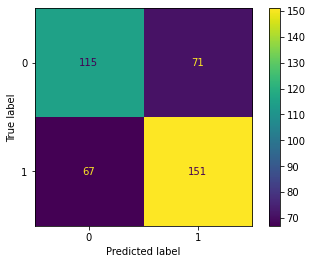

In [31]:
ConfusionMatrixDisplay(train_matrix).plot()
plt.show()

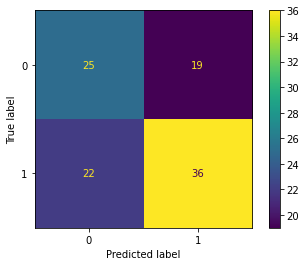

In [32]:
ConfusionMatrixDisplay(test_matrix).plot()
plt.show()

In [33]:
print('number of support vectors per class:', svc.n_support_)

number of support vectors per class: [171 175]


In [34]:
ratio = sum(svc.n_support_)/X.shape[0]
print('support vectors percentage:', round(ratio*100, 2))

support vectors percentage: 68.38
